# Phase 1 : Detection of natural clusters/groups of text by theme 

## Import Data

In [1]:
import pandas as pd
pd.set_option("display.max_colwidth", 100000)
import os 
os.getcwd()

'/Users/jadeguisiano/Desktop/Nations Unies/One-Planet'

In [2]:
Des = pd.read_csv('OPNDescriptions.csv', header=None, encoding='utf-8')
Des.columns = ['Descriptions']
Obj = pd.read_csv('OPNObjectives.csv', header=None, encoding='utf-8')
Obj.columns = ['Objectives']

In [3]:
Des.head(-5)

,Descriptions
0,A knowledge transfer and green-tech tool technique and strategy to integrate a capacity building frameworks within a high-capacity micro habitat to adapt installations into small medium and large scale applications A low impact concept introduces zero energy rapid-assembly silo planters to convert brownfield yard food deserts into free-standing vertical-cubic productivity sites. A combination of agro- ecology and a mobile micro farm model. All seasons. All weather. All Terrain.
1,The non-profit organisation Ecological Union and the module of careful consumption “Tepertak” have launched a new course dedicated to ecolabelling. The aim of this project is to educate consumers concerning variety of labels concerning differences between ecolabelling and greenwashing as well as concerning ways which can help to check the authenticity of labeling. The followers of the course are got a new email once a week.
2,The aim of Dunia Designs is to close the loop between production and waste making consumers active participants in environmental protection by giving a second life to waste plastics. In this way the enterprise is helping consumers to strike a key balance between lifestyle quality and sustainability. By tapping off waste plastic and feeding it back into the growing global demand for home and lifestyle products Dunia Designs contribute to a reduction in both forest depletion and plastic waste.
3,An evening full of inspiring nudges talks innovative ideas from the branded goods industry on 17 October 2019 from 18:30 at Concert Noble Brussels. Please note the Awards event is on invitation only.
4,The Life Cycle Initiative is a public-private multi-stakeholder partnership enabling the global use of credible life cycle knowledge by private and public decision makers. Hosted by UN Environment the Initiative is the interface between users and experts of Life Cycle approaches. It provides a global forum to ensure a science-based consensus-building process to support policies. It delivers authoritative opinion on sound tools and approaches in order to achieve global goals more efficiently.
5,Join for a webinar on Product Lifetime Extension. You will learn what product lifetime extension is and what it means for everyone on the planet. We will highlight how businesses can apply product life=me extension and circularity concepts to their corporate strategies and how policy makers and civil society members can help too by making shiFs in policy measures and daily routines.
6,WRAP recently launched a new campaign focused on the hospitality and food service sector to reduce food waste. The campaign is called Guardians of Grub. September is the ‘month of action’ for this campaign.
7,Ensuring Sustainable growth by catalyzing what the industry needs to do both in practice and in research to embed circular economy thinking in business strategy and decision making.
8,The Good Life Goals are meant to bridge the gap between the 2030 Agenda and the sustainable lifestyles movement and to inspire individuals to participate in the conversation and act on the Sustainable Development Goals (SDGs) in their everyday lives. A Swedish language version of the goals are exhibited on the streets of Linköping.
9,The Federal Ministry for the Environment Nature Conservation and Nuclear Safety (BMU) and the German Federal Agency for Nature Conservation (BfN) invite to the conference Sustainable Consumption for Biodiversity and Ecosystem Services Worldwide. The one-day event will take place on September 30 2019 in Berlin. The conference launches the study Protecting biodiversity and ecosystem services worldwide through sustainable consumption and invites for discussion.


In [5]:
#Des = Des['Descriptions'].astype(str).values.tolist() 

In [32]:
# Translate all possibles languages in English - API Google Translate - 
import copy
from googletrans import Translator
translator = Translator()

translatedList = []
for index, row in Des.iterrows():
    # REINITIALIZE THE API
    translator = Translator()
    newrow = copy.deepcopy(row)
    try:
        #translate the 'text' column
        translated = Translator.translate(text=row['Descriptions'], dest='en')
        newrow['translated'] = translated.text
    except Exception as e:
        print(str(e))
        continue
    translatedList.append(newrow)

translate() missing 1 required positional argument: 'self'
translate() missing 1 required positional argument: 'self'
translate() missing 1 required positional argument: 'self'
translate() missing 1 required positional argument: 'self'
translate() missing 1 required positional argument: 'self'
translate() missing 1 required positional argument: 'self'
translate() missing 1 required positional argument: 'self'
translate() missing 1 required positional argument: 'self'
translate() missing 1 required positional argument: 'self'
translate() missing 1 required positional argument: 'self'
translate() missing 1 required positional argument: 'self'
translate() missing 1 required positional argument: 'self'
translate() missing 1 required positional argument: 'self'
translate() missing 1 required positional argument: 'self'
translate() missing 1 required positional argument: 'self'
translate() missing 1 required positional argument: 'self'
translate() missing 1 required positional argument: 'sel

translate() missing 1 required positional argument: 'self'
translate() missing 1 required positional argument: 'self'
translate() missing 1 required positional argument: 'self'
translate() missing 1 required positional argument: 'self'
translate() missing 1 required positional argument: 'self'
translate() missing 1 required positional argument: 'self'
translate() missing 1 required positional argument: 'self'
translate() missing 1 required positional argument: 'self'
translate() missing 1 required positional argument: 'self'
translate() missing 1 required positional argument: 'self'
translate() missing 1 required positional argument: 'self'
translate() missing 1 required positional argument: 'self'
translate() missing 1 required positional argument: 'self'
translate() missing 1 required positional argument: 'self'
translate() missing 1 required positional argument: 'self'
translate() missing 1 required positional argument: 'self'
translate() missing 1 required positional argument: 'sel

translate() missing 1 required positional argument: 'self'
translate() missing 1 required positional argument: 'self'
translate() missing 1 required positional argument: 'self'
translate() missing 1 required positional argument: 'self'
translate() missing 1 required positional argument: 'self'
translate() missing 1 required positional argument: 'self'
translate() missing 1 required positional argument: 'self'
translate() missing 1 required positional argument: 'self'
translate() missing 1 required positional argument: 'self'
translate() missing 1 required positional argument: 'self'
translate() missing 1 required positional argument: 'self'
translate() missing 1 required positional argument: 'self'
translate() missing 1 required positional argument: 'self'
translate() missing 1 required positional argument: 'self'
translate() missing 1 required positional argument: 'self'
translate() missing 1 required positional argument: 'self'
translate() missing 1 required positional argument: 'sel

## Preprocessing the Data

In [4]:
import numpy as np
import nltk
import nltk
import re
from nltk.corpus import stopwords
from gensim.models import Word2Vec


#Remove everythings exepct alphabet 
Des['clean_des'] = Des['Descriptions'].str.replace("[^a-zA-Z#]", " ")

# Remove null fields
Des['clean_des'] = Des['clean_des'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

# Make all text lowercase
Des['clean_des'] = Des['clean_des'].apply(lambda x: x.lower())

# Tokenization
tokenized_doc = Des['clean_des'].apply(lambda x: x.split())

# Delete stop-words
nltk.download('stopwords')
stop_words = set(stopwords.words('english')) - set(['un'])
tokenized_doc = tokenized_doc.apply(lambda x: [item for item in x if item not in stop_words])

# To de_tokenization
detokenized_doc =[]
for i in range(len(Des)):
    t =' '.join(tokenized_doc[i])
    detokenized_doc.append(t)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/jadeguisiano/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
tokenized_doc

0                                                                                                       [knowledge, transfer, green, tech, tool, technique, strategy, integrate, capacity, building, frameworks, within, high, capacity, micro, habitat, adapt, installations, small, medium, large, scale, applications, impact, concept, introduces, zero, energy, rapid, assembly, silo, planters, convert, brownfield, yard, food, deserts, free, standing, vertical, cubic, productivity, sites, combination, agro, ecology, mobile, micro, farm, model, seasons, weather, terrain]
1                                                                                                                                                                                                                                               [profit, organisation, ecological, union, module, careful, consumption, tepertak, launched, course, dedicated, ecolabelling, project, educate, consumers, concerning, variety, labels, concerni

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer

# tfidf vectorizer of scikit learn
vectorizer = TfidfVectorizer(stop_words=stop_words,max_features=10000, max_df = 0.5, 
                             use_idf = True, ngram_range=(1,3))

In [101]:
X = vectorizer.fit_transform(detokenized_doc)

In [102]:
print(X.shape) # check shape of the document-term matrix

(818, 10000)


In [103]:
terms = vectorizer.get_feature_names()

## Clustering text documents using k-means

In [32]:
from sklearn.cluster import KMeans

num_clusters = 10
km = KMeans(n_clusters=num_clusters)
km.fit(X)
clusters = km.labels_.tolist()

## Applying LSA
Represent each and every term and document as a vector. We will use the document-term matrix and decompose it into multiple matrices.
We will use sklearn’s randomized_svd to perform the task of matrix decomposition.

In [93]:
from sklearn.utils.extmath import randomized_svd

U, Sigma, VT = randomized_svd(X, n_components=10, n_iter=100,
 random_state=122)

In [94]:
for i, comp in enumerate(VT):
        terms_comp = zip(terms, comp)
        sorted_terms = sorted(terms_comp, key= lambda x:x[1], reverse=True)[:6]
        print("Concept "+str(i)+": ")
        for t in sorted_terms:
            print(t[0])
        print(" ")

Concept 0: 
sustainable
tourism
food
project
development
waste
 
Concept 1: 
food
waste
food waste
systems
food systems
reduce
 
Concept 2: 
food
tourism
waste
food waste
sustainable tourism
gstc
 
Concept 3: 
sustainable
consumption
sustainable consumption
production
consumption production
sustainable consumption production
 
Concept 4: 
climate
climate change
change
communities
development
rural
 
Concept 5: 
environmental
education
students
sustainable development
waste
issues
 
Concept 6: 
energy
food systems
systems
sustainability
food
information
 
Concept 7: 
climate
change
climate change
information
communities
consumer
 
Concept 8: 
procurement
public
public procurement
climate
sustainable procurement
organic
 
Concept 9: 
cycle
life cycle
life
environmental
assessment
cycle assessment
 


In [96]:
sorted_terms

[('cycle', 0.27934398375735964),
 ('life cycle', 0.2738258978519869),
 ('life', 0.23543637800132902),
 ('environmental', 0.216501091063678),
 ('assessment', 0.1274293965543456),
 ('cycle assessment', 0.11747605673146659)]

## Visualization

In [51]:
import umap
import matplotlib.pyplot as plt

X_topics=U*Sigma
embedding = umap.UMAP(n_neighbors=100, min_dist=0.5, random_state=12).fit_transform(X_topics)

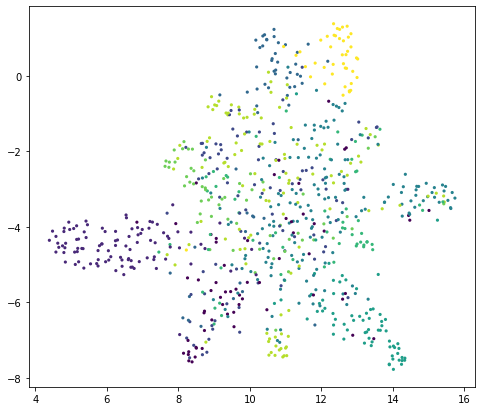

In [121]:
plt.figure(figsize=(8,7))
plt.scatter(embedding[:, 0], embedding[:, 1], 
c = clusters,
s = 10, # size
edgecolor='none',
                                  
)

plt.show()

SDGs themes :

1- Poverty 

2- Zero hunger

3- Health Wellness 

4- Education                                             // Concept 5

5- Gender equality

6- Clean water and sanitation

7- Clean Energy

8- Work, economic growth

9- Industry, innovation, infrastructure

10- Inequality

11- City, Sustainable Communities

12- Consumption, responsible production                // Concept 9  & 3

13- Climate change                                    //  Concept 7

14- Aquatic life

15- Earthly life

16- Peace, justice

17- Objective achievement
